# loading data

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization

import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score,precision_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

import os

In [2]:
X_train = pd.read_csv("../Capstone_Two_Project/data/processed/X_train.csv", index_col = 0)
X_train

,alcohol,fixed_acidity_ratio,density,residual_sugar,chlorides,total_sulfur_dioxide
0,0.405797,0.839710,0.130904,0.098160,0.053156,0.258065
1,0.260870,0.845020,0.256217,0.288344,0.074751,0.375576
2,0.304348,0.686411,0.161751,0.018405,0.099668,0.043779
3,0.478261,0.824361,0.084635,0.038344,0.071429,0.419355
4,0.637681,0.851406,0.045306,0.015337,0.059801,0.205069
...,...,...,...,...,...,...
6031,0.492754,0.914611,0.085629,0.015870,0.039605,0.240359
6032,0.343471,0.781272,0.100689,0.032700,0.044016,0.261061
6033,0.695652,0.808453,0.087512,0.105441,0.025885,0.274775
6034,0.672634,0.758345,0.055070,0.023051,0.035275,0.179995


In [3]:
X_test = pd.read_csv("../Capstone_Two_Project/data/processed/X_test.csv", index_col = 0)

In [4]:
y_train = pd.read_csv("../Capstone_Two_Project/data/processed/y_train.csv",index_col = False)
y_train.columns

y_train=y_train.drop('Unnamed: 0',axis=1)
y_train

,quality
0,0
1,0
2,1
3,0
4,1
...,...
6031,1
6032,1
6033,1
6034,1


In [5]:
y_test = pd.read_csv("../Capstone_Two_Project/data/processed/y_test.csv", index_col = False)
y_test=y_test.drop('Unnamed: 0',axis=1)
y_test

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1591,0
1592,1
1593,1
1594,1


# Modeling

## Metrics for model performance

This is a classification machine learning.The metrics of accuracy, recall, F1 and ROC_AUC will be evaluated. The project purpose is to predict good quality wine, and the dataset is imblanced, therefore the model with highest precision values with relative high accuracy among the four models:Logisticregression, randomforest, XGBoost, and KNN will be the winner.

## Baseline Classification

In [6]:
dummy = DummyClassifier(strategy ="stratified",random_state = 123)
dummy.fit(X_train.values,y_train.values)
y_pred = dummy.predict(X_test.values)
accuracy_baseline = dummy.score(X_test.values,y_test.values)
report = classification_report(y_test.values, y_pred)
precision_baseline = precision_score(y_test,y_pred)
print("accuracy_baseline:", accuracy_baseline,"\n")
print("precision_baseline:", precision_baseline,"\n")
print("report:", report,"\n")

accuracy_baseline: 0.4799498746867168 

precision_baseline: 0.17509247842170161 

report:               precision    recall  f1-score   support

           0       0.79      0.48      0.60      1293
           1       0.18      0.47      0.25       303

    accuracy                           0.48      1596
   macro avg       0.48      0.48      0.43      1596
weighted avg       0.68      0.48      0.53      1596
 



## 2.3 KNN model

In [7]:
train_accuracies ={}
test_accuracies = {}
precision_knn = {}

neighbors = np.arange(1,15)
for neighbor in neighbors:
    knn= KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor]= knn.score(X_test,y_test)
    precision_knn[neighbor] = precision_score(y_test, y_pred)
   

C:\Users\Yan Zhang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Yan Zhang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Yan Zhang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Yan Zhang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [8]:
print("train accuracy:", train_accuracies,"\n")
print("test accuracy:", test_accuracies,"\n")
print("precision:", precision_knn,"\n")

train accuracy: {1: 1.0, 2: 0.9870775347912525, 3: 0.9218025182239894, 4: 0.9259443339960238, 5: 0.8845261762756793, 6: 0.8899933730947648, 7: 0.864314115308151, 8: 0.8686216037110669, 9: 0.8475811795891319, 10: 0.8556991385023194, 11: 0.8356527501656726, 12: 0.8411199469847581, 13: 0.8278661365142479, 14: 0.8301855533465872} 

test accuracy: {1: 0.7568922305764411, 2: 0.768170426065163, 3: 0.7268170426065163, 4: 0.7387218045112782, 5: 0.7136591478696742, 6: 0.7218045112781954, 7: 0.7130325814536341, 8: 0.7224310776942355, 9: 0.7080200501253133, 10: 0.7211779448621554, 11: 0.7086466165413534, 12: 0.724937343358396, 13: 0.7105263157894737, 14: 0.7199248120300752} 

precision: {1: 0.17509247842170161, 2: 0.17509247842170161, 3: 0.17509247842170161, 4: 0.17509247842170161, 5: 0.17509247842170161, 6: 0.17509247842170161, 7: 0.17509247842170161, 8: 0.17509247842170161, 9: 0.17509247842170161, 10: 0.17509247842170161, 11: 0.17509247842170161, 12: 0.17509247842170161, 13: 0.17509247842170161,

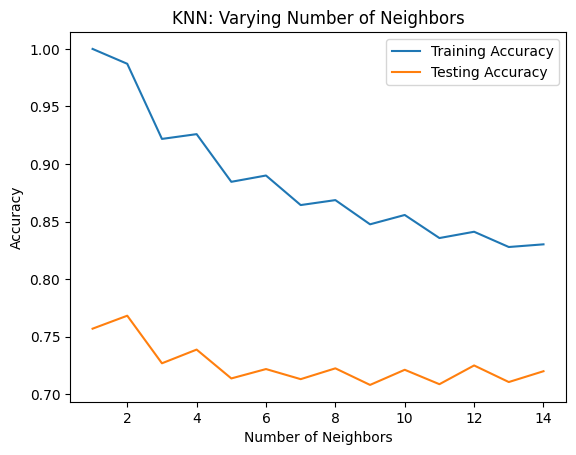

In [9]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()